Week 1
Read in and merge the two data sets (tip: think of different CSV formats that exist)
Clean the data: remove impossible values

To see what we're dealing with, print the first values of both data sets. 

In [1]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats.stats import pearsonr 


df1 = pd.read_csv('steps.csv', sep=";")
df1.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('survey.csv')
df2.head()


,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


The datasets contain the common column 'id', so their were combined using merge()

In [3]:
df = pd.merge(df1, df2, on = 'id') 
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


To see what values are wrong/faulty, we use the info() function, after which we can delete these values from the df

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to weight
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


mean steps over all columns

In [5]:
df["mean_steps"] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1) 
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


An analysis of mean steps per participant:
Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)

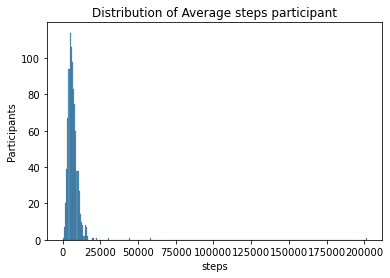

In [6]:
sns.histplot(df["mean_steps"])
plt.title("Distribution of Average steps participant")
plt.xlabel("steps")
plt.ylabel("Participants")
plt.show()

Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.

The center of distribution is between 6245 and 7036 steps a day, the standard deviation is high with 7396 steps, meaning there are probably some high outliers. The outliers, on average, take more steps on average, and thus there is a slight right skew. 



In [7]:
print('median: ' + str(float(df[['mean_steps']].median())))
print('mode: ' + str(df[['mean_steps']].mode()['mean_steps'][0]))
print('mean: ' + str(float(df[['mean_steps']].mean())))
print('standard deviation: ' + str(float(df[['mean_steps']].std())))
print('variance: ' + str(float(df[['mean_steps']].var())))

median: 6245.006060606061
mode: 4.0
mean: 7036.627484984338
standard deviation: 7396.87900787018
variance: 54713819.05707054


Week 2
Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
Describe and interpret the results

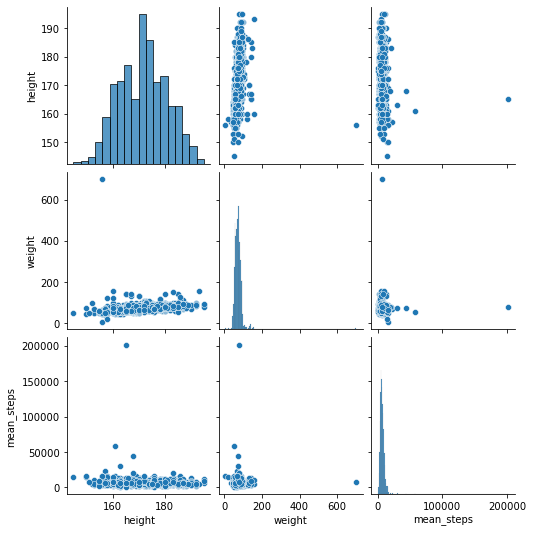

In [8]:
variables = df[["height", "weight", "mean_steps"]] #make selection
sns.pairplot(variables)#create scatterplot matrix
plt.show()

clean data, some values seem unlikely (someone's height being <1.40 m

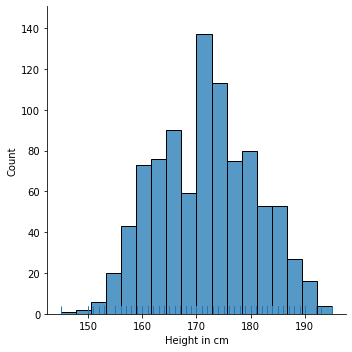

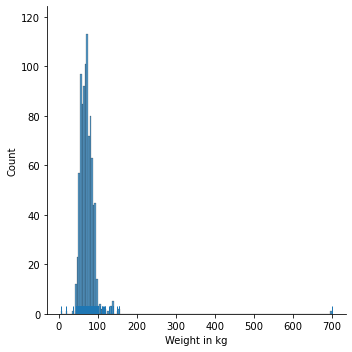

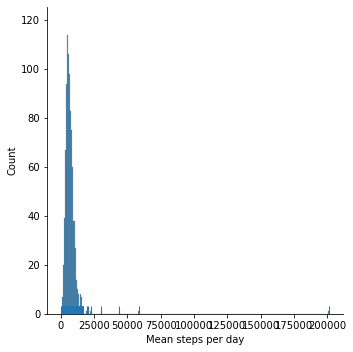

In [9]:
sns.displot(df["height"], rug=True, kde=False) 
plt.xlabel("Height in cm")
plt.ylabel("Count")
plt.show()

sns.displot(df["weight"], rug=True, kde=False) 
plt.xlabel("Weight in kg")
plt.ylabel("Count")
plt.show()

sns.displot(df["mean_steps"], rug=True, kde=False) 
plt.xlabel("Mean steps per day")
plt.ylabel("Count")
plt.show()

In [10]:
#set parameters of the graphs
df["height"].mask(df["height"].between(0, 140), inplace=True) #.mask() replaces values with NaN. .between() selects the values
df["weight"].mask(df["weight"].between(0, 35), inplace=True)
df["weight"].mask(df["weight"].between(200, 1000), inplace=True)
df["mean_steps"].mask(df["mean_steps"].between(75000, 300000), inplace=True) 

with many outliers, most plots seem to weak-mid correlation, but positive for does who do (e.g. heigth vs weigth and weigth vs mean steps)

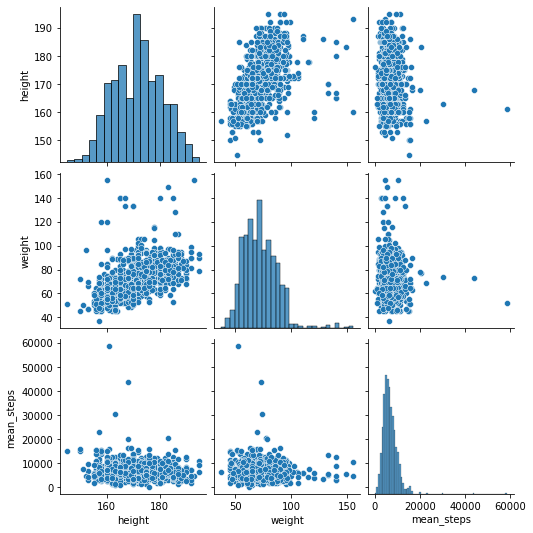

In [11]:
variables = df[["height", "weight", "mean_steps"]] #make selection
sns.pairplot(variables)#create scatterplot matrix
plt.show()

Make a scatterplot matrix of the numerical variables

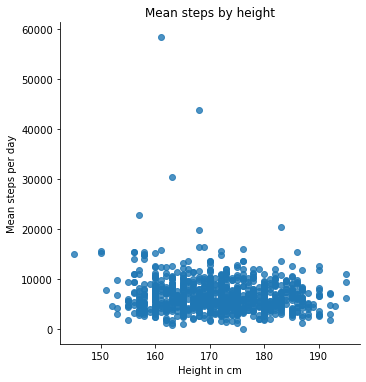

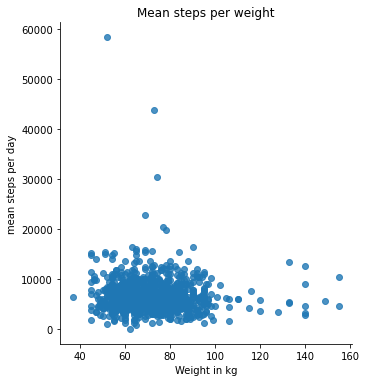

In [20]:
#scatterplot 1 = height vs mean steps
sns.lmplot(x='height', y='mean_steps', fit_reg=False, data=df)
plt.xlabel('Height in cm') 
plt.ylabel('Mean steps per day')
plt.title('Mean steps by height')
plt.show()

#scatterplot 2 = weight vs mean steps
sns.lmplot(x='weight', y='mean_steps', fit_reg=False, data=df)
plt.xlabel('Weight in kg') 
plt.ylabel('mean steps per day')
plt.title('Mean steps per weight')
plt.show()

There is a negative correlation between height & mean steps, and there is a positive correlation between weight and height. The first scatterplot shows a linear relationship, the second one is more likely to be a non-linear relationship.

In [13]:
# correlation between veriables
variables = variables.dropna() 
print(pearsonr(variables['height'], variables['mean_steps']))
print(pearsonr(variables['height'], variables['weight']))

(-0.09035480719937922, 0.006153428450897307)
(0.5110669373491963, 3.156690525355999e-62)


Week 3
lineair regression: a way to show the relationship between two different variables, using one independent variable (doesn't change based on the other, e.g. gender) and one dependent variable (can change, e.g. gender can influence income, but income not gender)

In [14]:
#dumm variables
df3 = df.copy()
df3 = pd.get_dummies(df3, columns = ['gender', 'education_1', 'city'])
pd.set_option('max_columns', None)
display(df3)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,21-7-2013,22-7-2013,23-7-2013,24-7-2013,25-7-2013,26-7-2013,27-7-2013,28-7-2013,29-7-2013,30-7-2013,31-7-2013,1-8-2013,2-8-2013,3-8-2013,4-8-2013,5-8-2013,6-8-2013,7-8-2013,8-8-2013,9-8-2013,10-8-2013,11-8-2013,12-8-2013,13-8-2013,14-8-2013,15-8-2013,16-8-2013,17-8-2013,18-8-2013,19-8-2013,20-8-2013,21-8-2013,22-8-2013,23-8-2013,24-8-2013,25-8-2013,26-8-2013,27-8-2013,28-8-2013,29-8-2013,30-8-2013,31-8-2013,1-9-2013,2-9-2013,3-9-2013,4-9-2013,5-9-2013,6-9-2013,7-9-2013,8-9-2013,9-9-2013,10-9-2013,11-9-2013,12-9-2013,13-9-2013,14-9-2013,15-9-2013,16-9-2013,17-9-2013,18-9-2013,19-9-2013,20-9-2013,21-9-2013,22-9-2013,23-9-2013,24-9-2013,25-9-2013,26-9-2013,27-9-2013,28-9-2013,29-9-2013,30-9-2013,1-10-2013,2-10-2013,3-10-2013,4-10-2013,5-10-2013,6-10-2013,7-10-2013,8-10-2013,9-10-2013,10-10-2013,11-10-2013,12-10-2013,13-10-2013,14-10-2013,15-10-2013,16-10-2013,17-10-2013,18-10-2013,19-10-2013,20-10-2013,21-10-2013,22-10-2013,23-10-2013,24-10-2013,25-10-2013,26-10-2013,27-10-2013,28-10-2013,29-10-2013,30-10-2013,31-10-2013,1-11-2013,2-11-2013,3-11-2013,4-11-2013,5-11-2013,6-11-2013,7-11-2013,8-11-2013,9-11-2013,10-11-2013,11-11-2013,12-11-2013,13-11-2013,14-11-2013,15-11-2013,16-11-2013,17-11-2013,18-11-2013,19-11-2013,20-11-2013,21-11-2013,22-11-2013,23-11-2013,24-11-2013,25-11-2013,26-11-2013,27-11-2013,28-11-2013,29-11-2013,30-11-2013,1-12-2013,2-12-2013,3-12-2013,4-12-2013,5-12-2013,6-12-2013,7-12-2013,8-12-2013,9-12-2013,10-12-2013,11-12-2013,12-12-2013,13-12-2013,14-12-2013,15-12-2013,16-12-2013,17-12-2013,18-12-2013,19-12-2013,20-12-2013,21-12-2013,22-12-2013,23-12-2013,24-12-2013,25-12-2013,26-12-2013,27-12-2013,28-12-2013,29-12-2013,30-12-2013,31-12-2013,1-1-2014,2-1-2014,3-1-2014,4-1-2014,5-1-2014,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,12-1-2014,13-1-2014,14-1-2014,15-1-2014,16-1-2014,17-1-2014,18-1-2014,19-1-2014,20-1-2014,21-1-2014,22-1-2014,23-1-2014,24-1-2014,25-1-2014,26-1-2014,27-1-2014,28-1-2014,29-1-2014,30-1-2014,31-1-2014,1-2-2014,2-2-2014,3-2-2014,4-2-2014,5-2-2014,6-2-2014,7-2-2014,8-2-2014,9-2-2014,10-2-2014,11-2-2014,12-2-2014,13-2-2014,14-2-2014,15-2-2014,16-2-2014,17-2-2014,18-2-2014,19-2-2014,20-2-2014,21-2-2014,22-2-2014,23-2-2014,24-2-2014,25-2-2014,26-2-2014,27-2-2014,28-2-2014,1-3-2014,2-3-2014,3-3-2014,4-3-2014,5-3-2014,6-3-2014,7-3-2014,8-3-2014,9-3-2014,10-3-2014,11-3-2014,12-3-2014,13-3-2014,14-3-2014,15-3-2014,16-3-2014,17-3-2014,18-3-2014,19-3-2014,20-3-2014,21-3-2014,22-3-2014,23-3-2014,24-3-2014,25-3-2014,26-3-2014,27-3-2014,28-3-2014,29-3-2014,30-3-2014,31-3-2014,1-4-2014,2-4-2014,3-4-2014,4-4-2014,5-4-2014,6-4-2014,7-4-2014,8-4-2014,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,age,hh_size,education,height,weight,mean_steps,gender_Female,gender_Male,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,10798.0,13885.0,9654.0,19481.0,8518.0,9385.0,30580.0,15490.0,5708.0,11983.0,14228.0,12205.0,14410.0,8667.0,NaN,10616.0,13538.0,12254.0,NaN,10410.0,9617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285.0,NaN,NaN,1000.0,6832.0,536.0,21103.0,4661.0,9006.0,NaN,6869.0,10016.0,8892.0,6022.0,9880.0,4011.0,NaN,14195.0,27310.0,2692.0,NaN,NaN,NaN,5966.0,NaN,NaN,NaN,12357.0,10626.0,NaN,NaN,NaN,NaN,696

I keep getting an error that my column is not in the frame, so I tried to display the full table to double check if the spelling/etc was correct.

In [15]:
df3.describe()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,1-7-2013,2-7-2013,3-7-2013,4-7-2013,5-7-2013,6-7-2013,7-7-2013,8-7-2013,9-7-2013,10-7-2013,11-7-2013,12-7-2013,13-7-2013,14-7-2013,15-7-2013,16-7-2013,17-7-2013,18-7-2013,19-7-2013,20-7-2013,21-7-2013,22-7-2013,23-7-2013,24-7-2013,25-7-2013,26-7-2013,27-7-2013,28-7-2013,29-7-2013,30-7-2013,31-7-2013,1-8-2013,2-8-2013,3-8-2013,4-8-2013,5-8-2013,6-8-2013,7-8-2013,8-8-2013,9-8-2013,10-8-2013,11-8-2013,12-8-2013,13-8-2013,14-8-2013,15-8-2013,16-8-2013,17-8-2013,18-8-2013,19-8-2013,20-8-2013,21-8-2013,22-8-2013,23-8-2013,24-8-2013,25-8-2013,26-8-2013,27-8-2013,28-8-2013,29-8-2013,30-8-2013,31-8-2013,1-9-2013,2-9-2013,3-9-2013,4-9-2013,5-9-2013,6-9-2013,7-9-2013,8-9-2013,9-9-2013,10-9-2013,11-9-2013,12-9-2013,13-9-2013,14-9-2013,15-9-2013,16-9-2013,17-9-2013,18-9-2013,19-9-2013,20-9-2013,21-9-2013,22-9-2013,23-9-2013,24-9-2013,25-9-2013,26-9-2013,27-9-2013,28-9-2013,29-9-2013,30-9-2013,1-10-2013,2-10-2013,3-10-2013,4-10-2013,5-10-2013,6-10-2013,7-10-2013,8-10-2013,9-10-2013,10-10-2013,11-10-2013,12-10-2013,13-10-2013,14-10-2013,15-10-2013,16-10-2013,17-10-2013,18-10-2013,19-10-2013,20-10-2013,21-10-2013,22-10-2013,23-10-2013,24-10-2013,25-10-2013,26-10-2013,27-10-2013,28-10-2013,29-10-2013,30-10-2013,31-10-2013,1-11-2013,2-11-2013,3-11-2013,4-11-2013,5-11-2013,6-11-2013,7-11-2013,8-11-2013,9-11-2013,10-11-2013,11-11-2013,12-11-2013,13-11-2013,14-11-2013,15-11-2013,16-11-2013,17-11-2013,18-11-2013,19-11-2013,20-11-2013,21-11-2013,22-11-2013,23-11-2013,24-11-2013,25-11-2013,26-11-2013,27-11-2013,28-11-2013,29-11-2013,30-11-2013,1-12-2013,2-12-2013,3-12-2013,4-12-2013,5-12-2013,6-12-2013,7-12-2013,8-12-2013,9-12-2013,10-12-2013,11-12-2013,12-12-2013,13-12-2013,14-12-2013,15-12-2013,16-12-2013,17-12-2013,18-12-2013,19-12-2013,20-12-2013,21-12-2013,22-12-2013,23-12-2013,24-12-2013,25-12-2013,26-12-2013,27-12-2013,28-12-2013,29-12-2013,30-12-2013,31-12-2013,1-1-2014,2-1-2014,3-1-2014,4-1-2014,5-1-2014,6-1-2014,7-1-2014,8-1-2014,9-1-2014,10-1-2014,11-1-2014,12-1-2014,13-1-2014,14-1-2014,15-1-2014,16-1-2014,17-1-2014,18-1-2014,19-1-2014,20-1-2014,21-1-2014,22-1-2014,23-1-2014,24-1-2014,25-1-2014,26-1-2014,27-1-2014,28-1-2014,29-1-2014,30-1-2014,31-1-2014,1-2-2014,2-2-2014,3-2-2014,4-2-2014,5-2-2014,6-2-2014,7-2-2014,8-2-2014,9-2-2014,10-2-2014,11-2-2014,12-2-2014,13-2-2014,14-2-2014,15-2-2014,16-2-2014,17-2-2014,18-2-2014,19-2-2014,20-2-2014,21-2-2014,22-2-2014,23-2-2014,24-2-2014,25-2-2014,26-2-2014,27-2-2014,28-2-2014,1-3-2014,2-3-2014,3-3-2014,4-3-2014,5-3-2014,6-3-2014,7-3-2014,8-3-2014,9-3-2014,10-3-2014,11-3-2014,12-3-2014,13-3-2014,14-3-2014,15-3-2014,16-3-2014,17-3-2014,18-3-2014,19-3-2014,20-3-2014,21-3-2014,22-3-2014,23-3-2014,24-3-2014,25-3-2014,26-3-2014,27-3-2014,28-3-2014,29-3-2014,30-3-2014,31-3-2014,1-4-2014,2-4-2014,3-4-2014,4-4-2014,5-4-2014,6-4-2014,7-4-2014,8-4-2014,9-4-2014,10-4-2014,11-4-2014,12-4-2014,13-4-2014,14-4-2014,15-4-2014,16-4-2014,17-4-2014,18-4-2014,19-4-2014,20-4-2014,21-4-2014,22-4-2014,23-4-2014,24-4-2014,25-4-2014,26-4-2014,27-4-2014,28-4-2014,29-4-2014,30-4-2014,1-5-2014,2-5-2014,3-5-2014,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,hh_size,education,height,weight,mean_steps,gender_Female,gender_Male,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier
count,929.000000,24.000000,243.000000,278.000000,296.000000,354.000000,353.000000,328.000000,380.000000,419.000000,302.000000,407.000000,429.000000,440.000000,455.000000,483.000000,506.000000,415.000000,389.000000,386.000000,367.000000,384.000000,373.000000,355.000000,317.000000,322.000000,380.000000,380.000000,314.000000,334.000000,328.000000,314.000000,303.000000,351.000000,356.000000,341.000000,304.000000,295.000000,248.000000,303.000000,319.000000,315.

I truly have no clue what is wrong with the values I'm selecting, I tried github/stackoverflow/the documentation & had some others look at it but no one could figure out what was wrong.

In [18]:
df3 = df3[['mean_steps']].dropna()
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df3[['id']] 
y = df3['mean_steps']
lm = LinearRegression() #this creates a new LR model 
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

KeyError: "None of [Index(['id'], dtype='object')] are in the [columns]"

r2